# Exploratory Data Analysis
### Jeff Ho

This notebook shows ingesting, cleaning, and understanding the data for this challenge.

**Goal:**
Provide recommendations to specific hotels

**Deliverables:**
1. Method to identify topics within reviews
2. Method to assign scores for each topic to each hotel

**Why?**
Understand each hotel’s performance beyond “happy”/“not happy”.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# load data
df_happy = pd.read_csv('hotel_happy_reviews.csv')
display(df_happy.head())
print(len(df_happy))

df_not_happy = pd.read_csv('hotel_not_happy_reviews.csv')
display(df_not_happy.head())
print(len(df_not_happy))

#join dataframes together
df = df_happy.append(df_not_happy)
print(len(df))

,User_ID,Description,Is_Response,hotel_ID
0,id10329,Stayed here with husband and sons on the way t...,happy,8
1,id10331,We had - rooms. One was very nice and clearly ...,happy,3
2,id10333,My wife & I stayed in this glorious city a whi...,happy,3
3,id10334,My boyfriend and I stayed at the Fairmont on a...,happy,7
4,id10336,"Steps off Times Square, nice rooms, stayed - n...",happy,3


26521


,User_ID,Description,Is_Response,hotel_ID
0,id10326,The room was kind of clean but had a VERY stro...,not happy,3
1,id10327,I stayed at the Crown Plaza April -- - April -...,not happy,9
2,id10328,I booked this hotel through Hotwire at the low...,not happy,3
3,id10330,My girlfriends and I stayed here to celebrate ...,not happy,3
4,id10332,My husband and I have stayed in this hotel a f...,not happy,7


12411
38932


### Basic questions about the data

In [7]:
# Are there 10 hotels as expected?
display(df['hotel_ID'].value_counts())
# Yes, and there is an imbalance where some hotels have a lot more reviews than others.

# How many users wrote reviews?
display(df['User_ID'].value_counts())
# All user ids are unique.

4     6847
5     6682
8     5353
7     5317
3     5082
1     3929
2     2058
10    1511
6     1157
9      996
Name: hotel_ID, dtype: int64

id21420    1
id26210    1
id19627    1
id45569    1
id21733    1
          ..
id20695    1
id29374    1
id31126    1
id32248    1
id16925    1
Name: User_ID, Length: 38932, dtype: int64

In [18]:
df['Is_Response'].value_counts() #check for nulls

happy        26521
not happy    12411
Name: Is_Response, dtype: int64

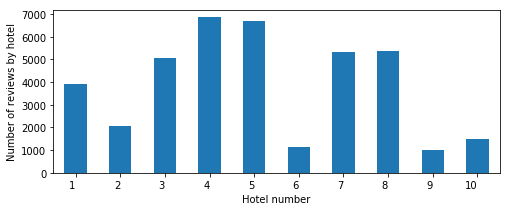

,happy
hotel_ID,
2,0.508260
10,0.514229
9,0.515060
1,0.554594
7,0.567801
4,0.679276
3,0.682802
6,0.711322
5,0.829093


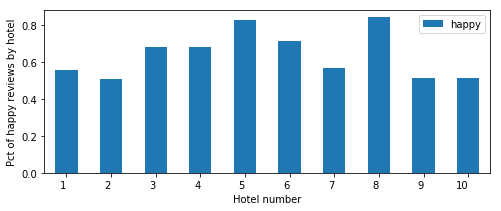

In [29]:
# Plot Hotel review number imbalance
fig,ax = plt.subplots(figsize=(8,3))
df['hotel_ID'].value_counts().sort_index().plot(ax=ax,kind='bar')
plt.xticks(rotation=0,ha='right')
plt.ylabel('Number of reviews by hotel')
plt.xlabel('Hotel number')
plt.show()

# Do some hotels have more happy/not-happy reviews?
df['happy'] = df['Is_Response'].apply(lambda x: 1 if x=='happy' else 0)
happy_pct = df[['hotel_ID','happy']].groupby('hotel_ID').mean()
display(happy_pct.sort_values(by='happy'))
fig,ax = plt.subplots(figsize=(8,3))
happy_pct.plot(ax=ax,kind='bar')
plt.xticks(rotation=0,ha='right')
plt.ylabel('Pct of happy reviews by hotel')
plt.xlabel('Hotel number')
plt.show()


### Examplex of reviews to build intuition about data

In [40]:
# Randomly sample 10 reviews
for review in df.sample(10).values:
    print(review[:-2])
    print('\n')

['id31099'
 'We stayed for - weeks and were sorry to leave. Staff very helpful and professional. We had some issues with a number of things not working (Internet in room was not reliable so we were relocated - thanks Jay) and while it would have been better if there had been no problems these were sorted out. Rooms are bright & comfortable, bathroom fine (not sure why so many have issue with the shower configuration) and the roof top bar was perfect place to recall our daily outings. We would definitely stay here again due to the location and friendly smiling staff'
 'happy']


['id13149'
 'The Washington Court Hotel graciously upgraded us (in special circumstances) to a room with a fabulous! view of the Capitol. The rooms were quite nice with comfortable beds & the staff very helpful and friendly. The location is very convenient for DC.'
 'happy']


['id44836'
 'We traveled a lot with SPG hotels, largely because the chain covers some really good properties in Europe and Asian, we have

### Findings:

1. Reviews are quite long.
2. Need to clean a lot of special characters
3. Numbers have been redacted.